# Zika Tutorial

## What is this, where am I?

This is an ipython-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find all necessary informations on our central [github repository](https://github.com/ContentMine/2015-11-07-mozfest15) and you can share your thoughts and questions in realtime with others on our [pad](http://pads.cottagelabs.com/p/mozfest15).

## What are we going to do?

We will look at the occurrences of clinical trial ID's in the papers. We show you how to use the notebook, explain what the data is about, and provide you with a sandbox environment where you can investigate the data on your own.

## Set up your environment
Import the prepared python functions into the notebook. Hackers and anyone who want to look under the hood can find the prepared functions in the resources folder, and the dataset in the trialsjournal folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter

%matplotlib inline

### Reading in the dataset

In the next cell we read in the prepared data, which is located in the trialsjournal folder, into the notebook and assign it to the TRIALS variable. This data contains the results from executing the ContentMine tool chain. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset.

So we have

In [2]:
zika = CProject("", "zika") # empty path value means we are already in the root directory
zika.size

1126

## Get the word frequencies

In [3]:
words = Counter()
for ctree in zika.get_ctrees():
    #print(ctree.ID)
    #print(ctree.results['word']['frequencies'])
    if 'word' in ctree.results:
        for word in ctree.results['word']['frequencies']:
            #print(word)
            #print(word['word'])
            #print(int(word['count']))
            words.update({word['word'], int(word['count'])})
print(words)

Counter({4: 68231, 5: 44228, 6: 27214, 7: 19432, 8: 15817, 9: 10508, 10: 8349, 11: 6664, 12: 5454, 13: 4481, 14: 3776, 17: 3452, 18: 3189, 15: 3107, 16: 2717, 20: 2711, 21: 2492, 29: 1778, 19: 1770, 22: 1339, 23: 1163, '{font-weight': 1088, 'pt;}': 1088, 'bold': 1088, '#ffffff;}': 1088, '{font-style': 1088, 'em;': 1088, 'px;': 1088, '{border-style': 1088, 'courier;': 1088, 'solid;': 1088, 'border-color': 1088, 'double;': 1088, '{background': 1088, 'border-width': 1088, 'font-size': 1088, 'px;}': 1088, 'margin': 1088, '{font-family': 1088, 'the': 1087, 'and': 1084, 'for': 1058, 'with': 1045, 'The': 1030, 24: 1027, 'that': 1021, 'from': 1012, 25: 1006, 'are': 973, 'was': 935, 'this': 918, 'have': 917, 'were': 874, 'not': 856, 26: 838, 'which': 837, 27: 821, 'has': 811, 'been': 809, 'virus': 803, 'al.': 797, 'other': 768, 'also': 755, 'This': 753, 28: 731, 'these': 699, 'between': 659, 30: 644, 'using': 640, 'during': 606, 'can': 604, 31: 601, 'all': 601, 'more': 598, 'used': 589, 'infect

Print the 20 most common terms in the papers.

In [15]:
for word, count in words.most_common(20):
    print(word, count)

4 68231
5 44228
6 27214
7 19432
8 15817
9 10508
10 8349
11 6664
12 5454
13 4481
14 3776
17 3452
18 3189
15 3107
16 2717
20 2711
21 2492
29 1778
19 1770
22 1339


Plot the frequencies as a histogram

In [5]:
frequ = [value for key, value in words.most_common()[500:]]

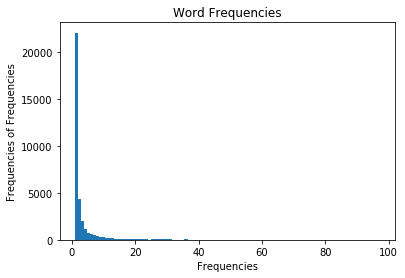

In [6]:
plt.hist(frequ, bins=100)
plt.title("Word Frequencies")
plt.xlabel("Frequencies")
plt.ylabel("Frequencies of Frequencies")
plt.show()

In [7]:
words.most_common(100)
#words[4]

[(4, 68231),
 (5, 44228),
 (6, 27214),
 (7, 19432),
 (8, 15817),
 (9, 10508),
 (10, 8349),
 (11, 6664),
 (12, 5454),
 (13, 4481),
 (14, 3776),
 (17, 3452),
 (18, 3189),
 (15, 3107),
 (16, 2717),
 (20, 2711),
 (21, 2492),
 (29, 1778),
 (19, 1770),
 (22, 1339),
 (23, 1163),
 ('{font-weight', 1088),
 ('pt;}', 1088),
 ('bold', 1088),
 ('#ffffff;}', 1088),
 ('{font-style', 1088),
 ('em;', 1088),
 ('px;', 1088),
 ('{border-style', 1088),
 ('courier;', 1088),
 ('solid;', 1088),
 ('border-color', 1088),
 ('double;', 1088),
 ('{background', 1088),
 ('border-width', 1088),
 ('font-size', 1088),
 ('px;}', 1088),
 ('margin', 1088),
 ('{font-family', 1088),
 ('the', 1087),
 ('and', 1084),
 ('for', 1058),
 ('with', 1045),
 ('The', 1030),
 (24, 1027),
 ('that', 1021),
 ('from', 1012),
 (25, 1006),
 ('are', 973),
 ('was', 935),
 ('this', 918),
 ('have', 917),
 ('were', 874),
 ('not', 856),
 (26, 838),
 ('which', 837),
 (27, 821),
 ('has', 811),
 ('been', 809),
 ('virus', 803),
 ('al.', 797),
 ('other'

## Let's dive into the data!

First we create a network between papers and entities such as genes or genus. In this network a node is either a unique identifier of a paper, or the name of the entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified through the [ami-plugins](https://github.com/ContentMine/ami/).

### Choose the type of entity
Uncomment the type of entity you want to take a look at: "person", "organization" or "location". 
Be aware: This will be your entity type for the rest of the hacking session.

In [8]:
B, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

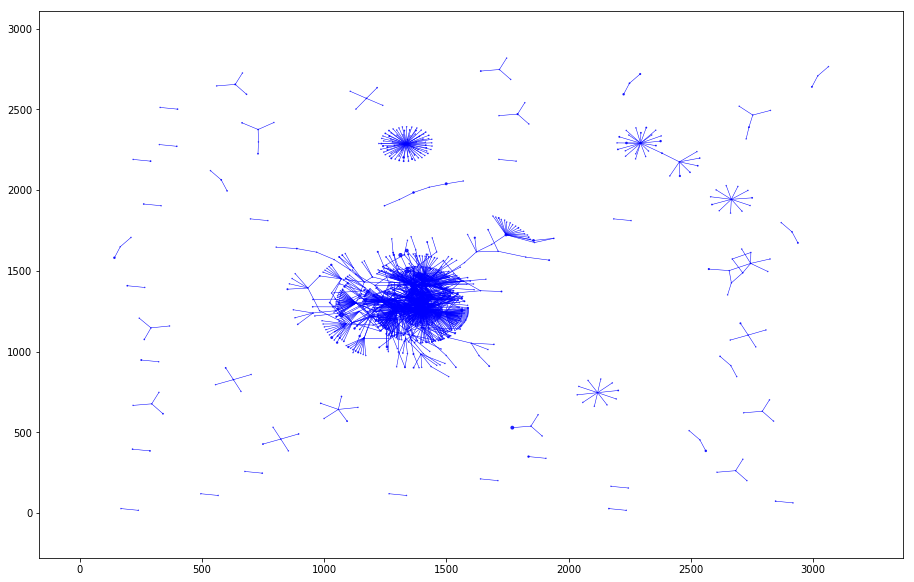

In [9]:
plotGraph(B)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

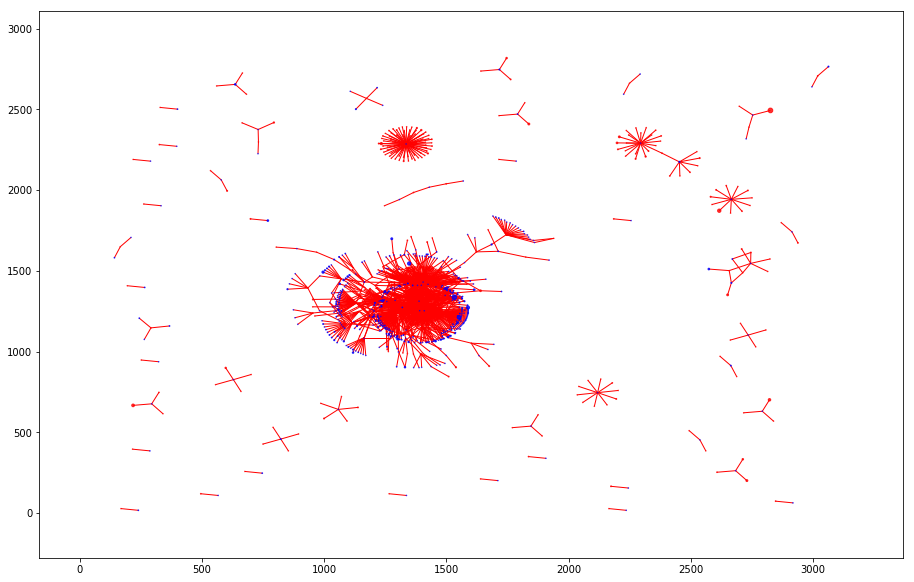

In [12]:
plotBipartiteGraph(B)

In [10]:
#plotBipartiteGraph(B)
M, fact_graph, paper_graph, fact_nodes, paper_nodes = create_complete_graph(zika)

gene is not available for PMC5031459, run ami-gene first.
sequence is not available for PMC5031459, run ami-sequence first.
sequence is not available for PMC5031459, run ami-sequence first.
gene is not available for PMC2263041, run ami-gene first.
sequence is not available for PMC2263041, run ami-sequence first.
sequence is not available for PMC2263041, run ami-sequence first.
gene is not available for PMC4910250, run ami-gene first.
sequence is not available for PMC4910250, run ami-sequence first.
sequence is not available for PMC4910250, run ami-sequence first.
gene is not available for PMC4895102, run ami-gene first.
sequence is not available for PMC4895102, run ami-sequence first.
sequence is not available for PMC4895102, run ami-sequence first.
gene is not available for PMC4833829, run ami-gene first.
sequence is not available for PMC4833829, run ami-sequence first.
sequence is not available for PMC4833829, run ami-sequence first.
gene is not available for PMC5044512, run ami-gene

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

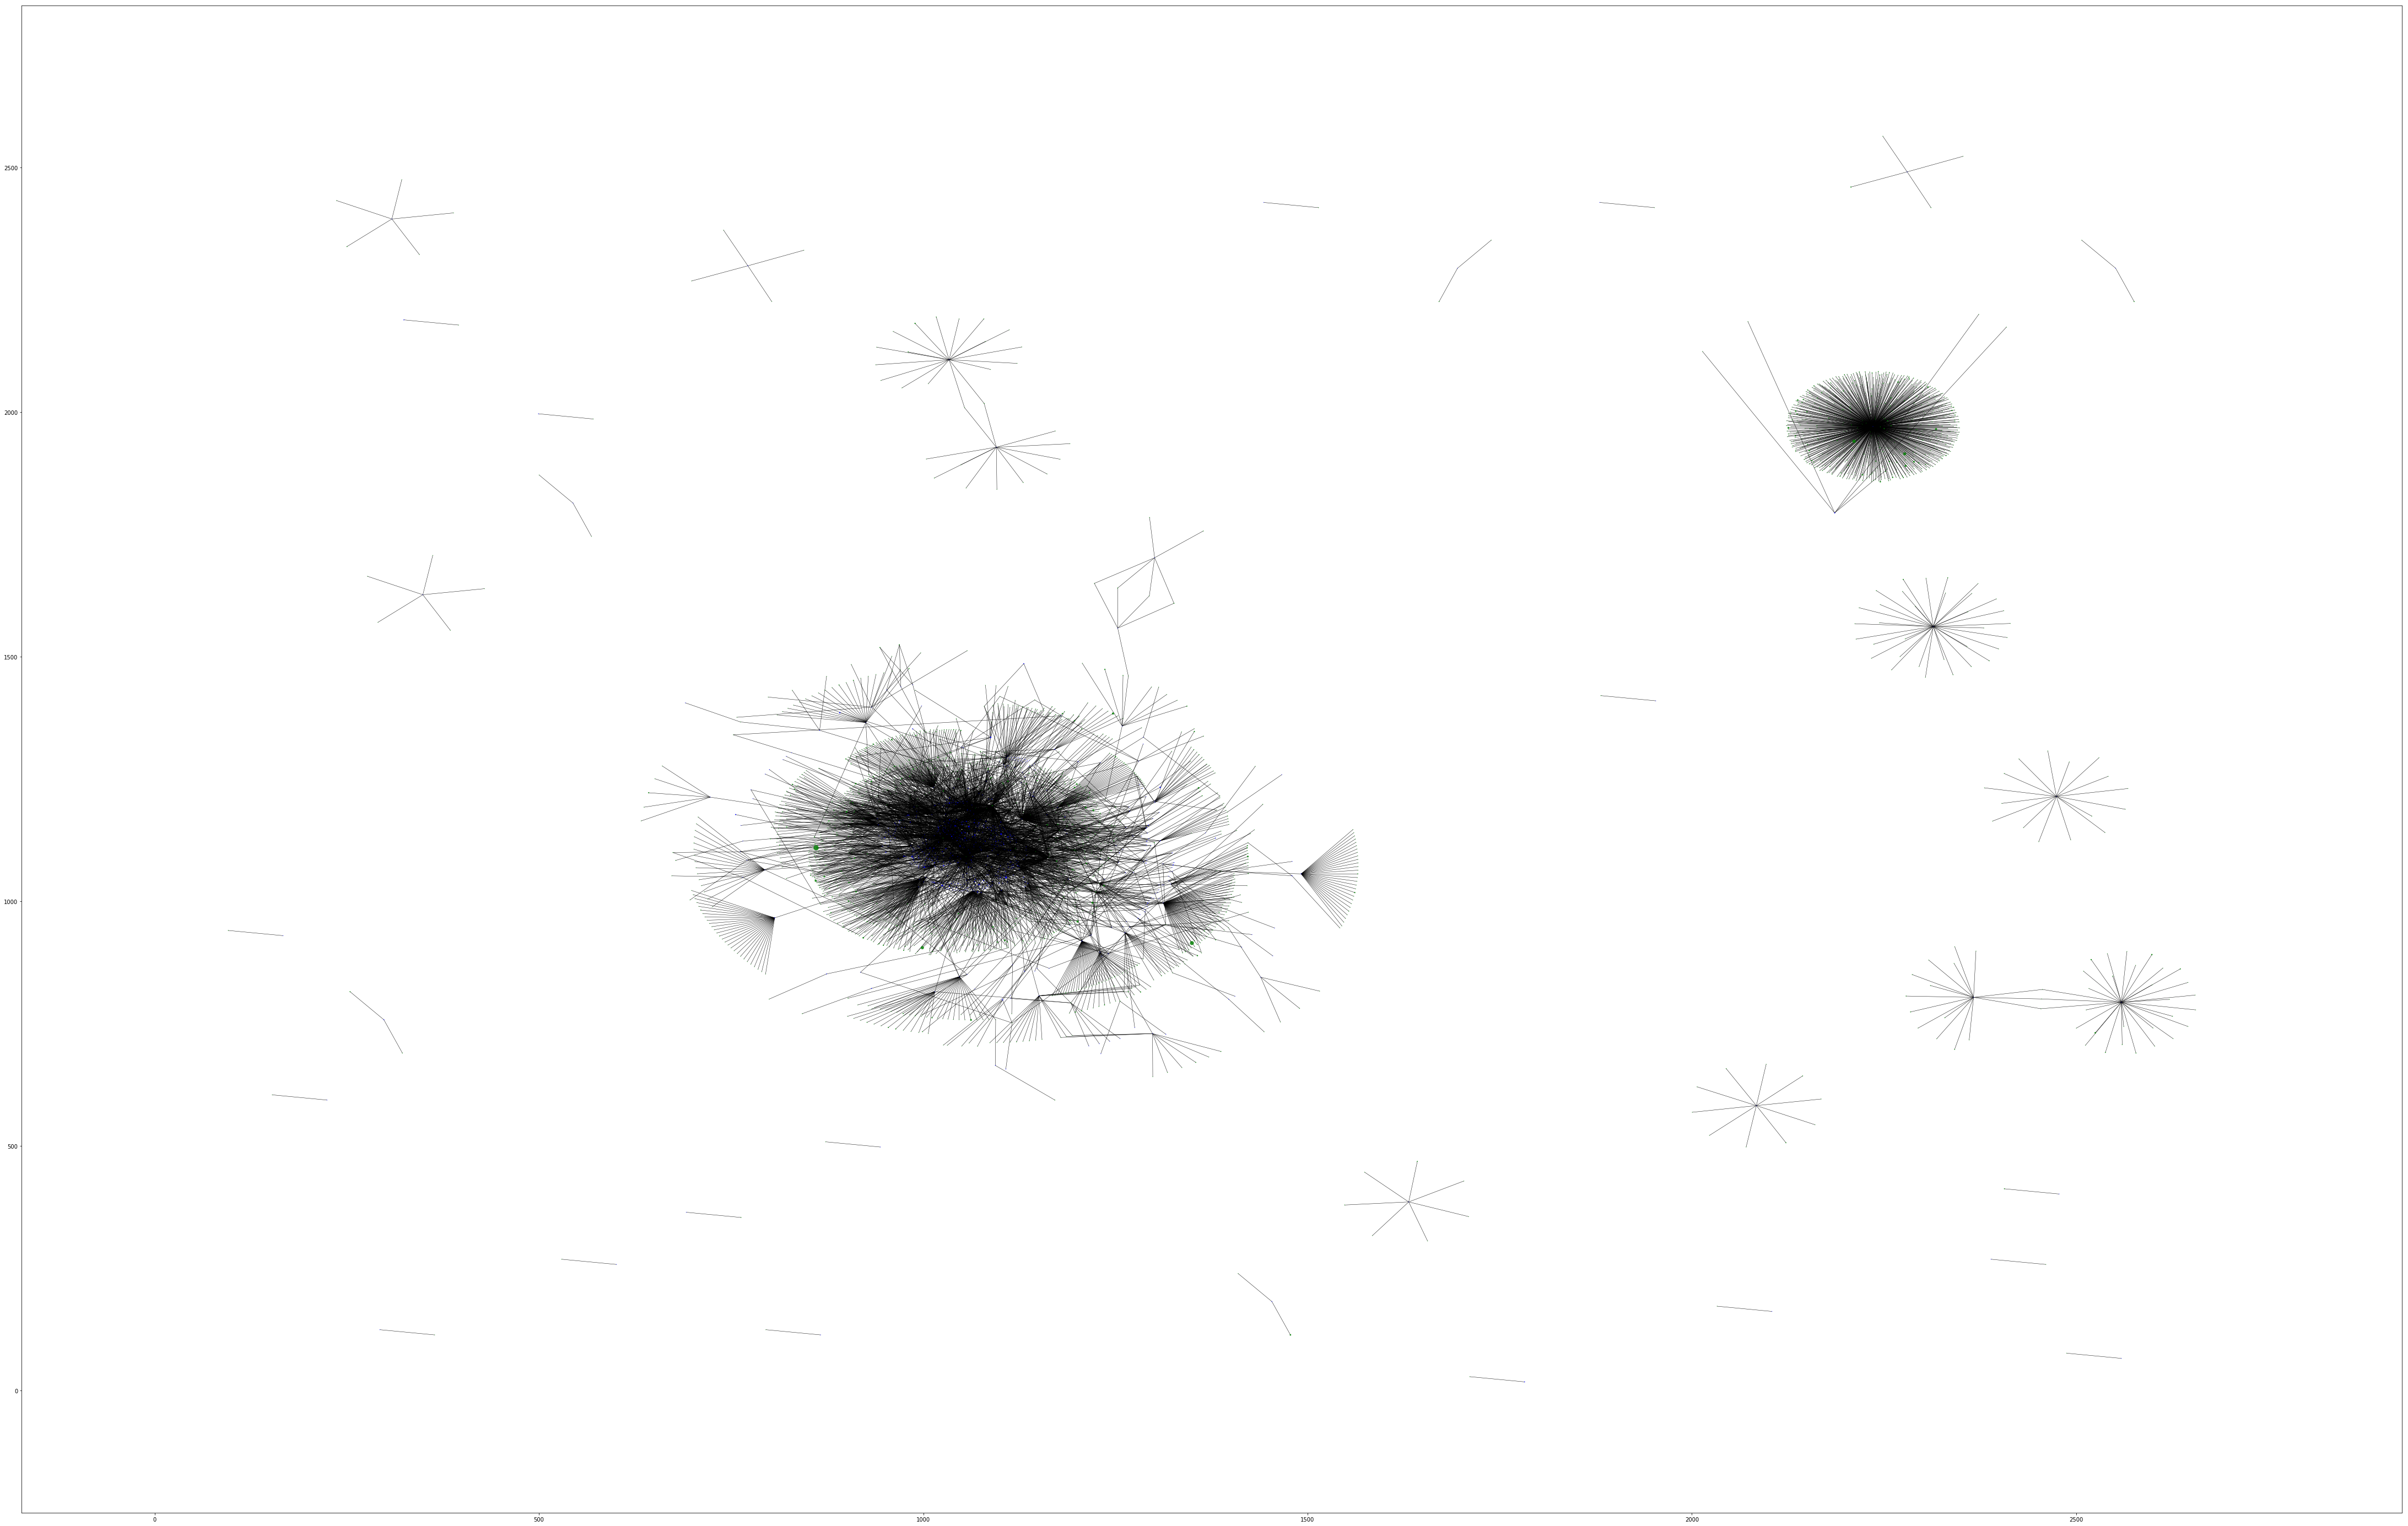

In [11]:
plotMultipartiteGraph(M)